# Unit 5 - Financial Planning

In [52]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [53]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [54]:
# Set current amount of crypto assets
btc = 1.2
eth = 5.3

In [55]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [56]:
# Fetch current BTC price
responseDataBtc = requests.get(btc_url)
responseDataBtc
responseContentBtc = responseDataBtc.content
responseContentBtc
dataBtc = responseDataBtc.json()
import json
print(json.dumps(dataBtc, indent = 4))
responseDataEth = requests.get(eth_url)
responseContentEth = responseDataEth.content
dataEth = responseDataEth.json()
import json
print(json.dumps(dataEth, indent = 4))

# Fetch current ETH price
btcValue = dataBtc["data"]["1"]["quotes"]["USD"]["price"]
ethValue = dataEth["data"]["1027"]["quotes"]["USD"]["price"]


# Compute current value of my crpto
currentBtcValue = btc * btcValue
currentEthValue = eth * ethValue
# Print current crypto wallet balance
print(f"The current value of your {btc} BTC is ${currentBtcValue:0.2f}")
print(f"The current value of your {eth} ETH is ${currentEthValue:0.2f}")

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18744731,
            "total_supply": 18744731,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 36411.0,
                    "volume_24h": 35102815046,
                    "market_cap": 682656898314,
                    "percentage_change_1h": 0.229638384869206,
                    "percentage_change_24h": 4.87942437811639,
                    "percentage_change_7d": 14.8168854036749,
                    "percent_change_1h": 0.229638384869206,
                    "percent_change_24h": 4.87942437811639,
                    "percent_change_7d": 14.8168854036749
                },
                "CAD": {
                    "price": 45149.64,
                    "volume_24h": 43527490657.04,
                    "market

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [57]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [58]:
# Set Alpaca API key and secret
alpacaApiKey = os.getenv("ALPACA_API_KEY")
alpacaSecretKey = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
api = tradeapi.REST(alpacaApiKey, alpacaSecretKey, api_version = "v2")

In [59]:
# Format current date as ISO format
today = pd.Timestamp("2021-06-29", tz = "America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
portfolio = api.get_barset(tickers,timeframe, start = today, end = today, limit=1000).df

# Preview DataFrame
portfolio.head()

AGG                                       SPY  \
                             open    high      low   close   volume    open   
time                                                                          
2021-06-29 00:00:00-04:00  115.06  115.25  115.045  115.25  3469405  427.89   

                                                             
                             high     low   close    volume  
time                                                         
2021-06-29 00:00:00-04:00  428.56  427.13  427.68  32097572

In [60]:
# Pick AGG and SPY close prices
agg_close_price = float(portfolio["AGG"]["close"])
spy_close_price = float(portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.25
Current SPY closing price: $427.68


In [61]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21384.00
The current value of your 200 AGG shares is $23050.00


### Savings Health Analysis

In [62]:
# Set monthly household income
monthlyIncome = 12000

# Consolidate financial assets data
crypto= currentBtcValue + currentEthValue
shares = my_agg_value + my_spy_value
data = {'amount':[crypto,shares]}
# Create savings DataFrame
df_savings = pd.DataFrame(data, index=['crptyo','shares'])
# Display savings DataFrame
display(df_savings)

,amount
crptyo,55483.262
shares,44434.000


<AxesSubplot:title={'center':'Personal Savings'}, ylabel='amount'>

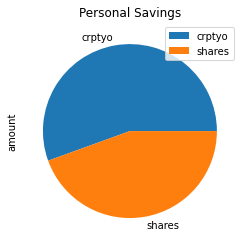

In [63]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Personal Savings")

In [64]:
# Set ideal emergency fund
emergency_fund = monthlyIncome * 3

# Calculate total amount of savings
totalSavings = crypto + shares
# Validate saving health
if emergency_fund < totalSavings:
        print("Congratuations! You have enough money in your emergency fund.")
elif emergency_fund == totalSavings:
        print("Congratulations! You have reach this financial goal")
else:
        print(f"You are {emergency_fund - totalSavings} dollars away from reaching the goal")

Congratuations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [65]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [66]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["AGG","SPY"]
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = api.get_barset(tickers, timeframe, start=start_date, end=end_date,limit =1000).df
df_stock_data.index = df_stock_data.index.date
# Display sample data
df_stock_data.head()

AGG                                            SPY          \
              open     high       low    close     volume    open    high   
2017-05-10  108.60  108.660  108.4400  108.520  1427511.0     NaN     NaN   
2017-05-11  108.35  108.540  108.3435  108.515  1773499.0  239.35  239.57   
2017-05-12  108.81  108.940  108.7800  108.920  1136553.0  239.09  239.21   
2017-05-15  108.85  108.940  108.8200  108.890  1620264.0  239.47  240.44   
2017-05-16  108.88  109.101  108.8800  109.000  1394153.0  240.62  240.67   

                                         
               low    close      volume  
2017-05-10     NaN      NaN         NaN  
2017-05-11  238.13  239.410  45435690.0  
2017-05-12  238.67  239.030  35283567.0  
2017-05-15  239.45  240.245  42230620.0  
2017-05-16  239.63  240.100  37206183.0

In [67]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
mc_even_dist =MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*30)

In [68]:
# Printing the simulation input data
mc_even_dist.portfolio_data.head()

AGG                                                      \
              open     high       low    close     volume daily_return   
2017-05-10  108.60  108.660  108.4400  108.520  1427511.0          NaN   
2017-05-11  108.35  108.540  108.3435  108.515  1773499.0    -0.000046   
2017-05-12  108.81  108.940  108.7800  108.920  1136553.0     0.003732   
2017-05-15  108.85  108.940  108.8200  108.890  1620264.0    -0.000275   
2017-05-16  108.88  109.101  108.8800  109.000  1394153.0     0.001010   

               SPY                                                    
              open    high     low    close      volume daily_return  
2017-05-10     NaN     NaN     NaN      NaN         NaN          NaN  
2017-05-11  239.35  239.57  238.13  239.410  45435690.0          NaN  
2017-05-12  239.09  239.21  238.67  239.030  35283567.0    -0.001587  
2017-05-15  239.47  240.44  239.45  240.245  42230620.0     0.005083  
2017-05-16  240.62  240.67  239.63  240.100  37206183.0    -0.000604

In [69]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997718,1.000356,1.009092,0.985319,1.002300,0.992344,1.014086,1.006615,0.992903,1.001317,...,0.997324,1.005134,1.019299,1.009948,1.009121,0.999880,1.000190,0.995464,0.993767,1.000447
2,0.995627,1.008077,1.010870,1.000493,1.005220,0.993691,1.026277,1.001549,0.993651,1.002293,...,1.009774,1.010462,1.008820,1.007538,1.016549,0.994338,1.002185,0.981925,1.007353,0.989188
3,0.985093,1.007097,1.014048,0.995540,1.004419,1.007362,1.029945,1.001795,0.988152,1.007289,...,1.012255,0.997467,1.017277,0.999958,1.019775,0.985743,1.011127,0.979528,0.990386,0.985017
4,0.978068,0.996563,1.020739,1.005617,1.005267,0.986843,1.024023,0.998347,0.980649,1.000316,...,1.024879,0.995974,1.021621,0.984213,1.021723,0.993956,1.015986,0.976038,0.996011,0.991984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,31.064161,19.796647,8.387720,12.235598,46.960853,9.351471,71.477325,19.877932,23.323649,34.326582,...,13.639353,22.094634,20.768871,61.626030,20.854959,43.221176,4.259163,17.018221,46.727000,27.168377
7557,30.822918,20.076032,8.478654,12.272307,47.195875,9.389495,71.834547,19.726934,23.448631,34.586501,...,13.770474,21.955340,20.915777,61.276757,20.683976,42.362251,4.223616,17.077499,46.495110,27.359031
7558,30.934884,20.310866,8.470905,12.162211,47.536568,9.483938,71.875101,19.978684,23.577776,34.496436,...,13.499235,22.054006,20.907381,60.734130,21.052268,42.758100,4.285635,17.166913,46.555016,27.277611
7559,30.947029,20.320898,8.498609,12.181688,47.239522,9.421169,72.210532,19.839643,23.690118,34.593986,...,13.496652,21.742823,21.193425,60.269693,21.021280,43.058842,4.318549,17.182223,46.884250,27.228195


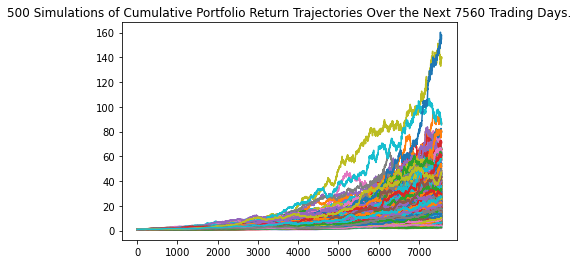

In [70]:
# Plot simulation outcomes
linePlot = mc_even_dist.plot_simulation()

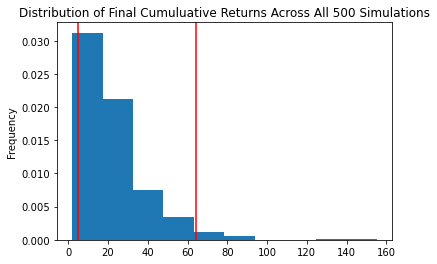

In [71]:
# Plot probability distribution and confidence intervals
distPlot = mc_even_dist.plot_distribution()


### Retirement Analysis

In [72]:
# Fetch summary statistics from the Monte Carlo simulation results
table = mc_even_dist.summarize_cumulative_return()

# Print summary statistics
print(table)

count           500.000000
mean             22.770851
std              17.333543
min               1.926312
25%              11.724264
50%              17.812286
75%              28.577519
max             155.002269
95% CI Lower      4.949144
95% CI Upper     64.253727
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [73]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000l
ci_lower = round(table[8]*20000,2)
ci_upper = round(table[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $98982.88 and $1285074.54


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [74]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(table[8]*30000,2)
ci_upper = round(table[9]*30000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $148474.32 and $1927611.81


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [75]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
mc_even_dist_five = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*5)
mc_even_dist_five.portfolio_data.head()

AGG                                                      \
              open     high       low    close     volume daily_return   
2017-05-10  108.60  108.660  108.4400  108.520  1427511.0          NaN   
2017-05-11  108.35  108.540  108.3435  108.515  1773499.0    -0.000046   
2017-05-12  108.81  108.940  108.7800  108.920  1136553.0     0.003732   
2017-05-15  108.85  108.940  108.8200  108.890  1620264.0    -0.000275   
2017-05-16  108.88  109.101  108.8800  109.000  1394153.0     0.001010   

               SPY                                                    
              open    high     low    close      volume daily_return  
2017-05-10     NaN     NaN     NaN      NaN         NaN          NaN  
2017-05-11  239.35  239.57  238.13  239.410  45435690.0          NaN  
2017-05-12  239.09  239.21  238.67  239.030  35283567.0    -0.001587  
2017-05-15  239.47  240.44  239.45  240.245  42230620.0     0.005083  
2017-05-16  240.62  240.67  239.63  240.100  37206183.0    -0.000604

In [76]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
mc_even_dist_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996604,1.007976,1.013581,0.992923,0.997618,0.983776,0.986389,0.999217,0.991388,1.012695,...,0.995169,1.011859,1.007514,0.994123,1.000103,1.008947,0.995552,1.005194,1.001911,1.016519
2,1.014582,1.023431,1.001576,1.002830,0.989046,0.985276,0.980077,1.001786,0.998912,1.005576,...,0.985587,1.013596,1.004236,0.992204,1.000070,0.999049,0.998803,1.011933,1.002196,1.022209
3,1.005255,1.028542,0.997955,1.004928,0.991844,0.989767,0.971159,1.005341,1.016261,0.997058,...,0.990903,1.015035,1.019803,0.997189,0.999974,1.003094,1.000594,1.010431,0.992728,1.021684
4,1.006218,1.033191,0.990019,1.011483,0.982079,0.988074,0.961477,1.005558,1.013192,1.006872,...,0.985500,1.010874,1.019476,1.002122,1.016337,1.002504,0.998468,1.009379,0.987865,1.025510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.965936,2.141074,1.157637,2.009618,1.591246,1.998085,1.408953,1.383036,1.159514,1.542602,...,1.755784,1.310023,1.208205,1.619710,1.122960,3.006971,1.956659,1.867337,1.858473,1.321468
1257,0.958906,2.139768,1.165742,2.046802,1.582971,1.987961,1.398361,1.397978,1.164184,1.541513,...,1.764618,1.305987,1.198490,1.634119,1.112532,3.011119,1.959673,1.847790,1.883126,1.321278
1258,0.967522,2.141976,1.162441,2.043813,1.572128,1.986505,1.381540,1.419742,1.175553,1.548852,...,1.791622,1.298568,1.187722,1.635557,1.109126,2.979271,1.955587,1.865493,1.898030,1.314347
1259,0.969412,2.124680,1.159096,2.038814,1.567876,2.005704,1.375911,1.430984,1.165540,1.547416,...,1.758688,1.308039,1.196691,1.638887,1.094392,3.019439,1.935955,1.864450,1.890469,1.315600


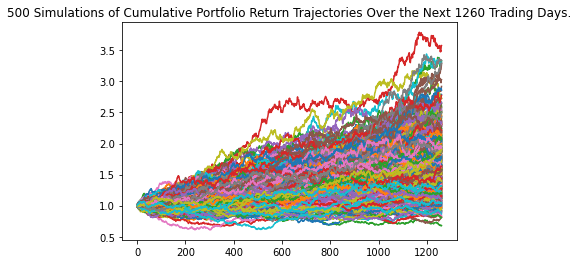

In [77]:
# Plot simulation outcomes
linePlotFive = mc_even_dist_five.plot_simulation()

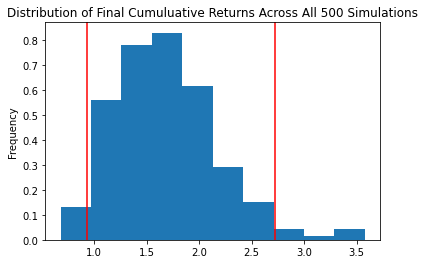

In [78]:
# Plot probability distribution and confidence intervals
distPlotFive = mc_even_dist_five.plot_distribution()

In [79]:
# Fetch summary statistics from the Monte Carlo simulation results
tableFive = mc_even_dist_five.summarize_cumulative_return()

print(tableFive)

count           500.000000
mean              1.680072
std               0.478121
min               0.678979
25%               1.327580
50%               1.629886
75%               1.966836
max               3.577437
95% CI Lower      0.927903
95% CI Upper      2.726240
Name: 1260, dtype: float64


In [80]:
# Set initial investment
initial_investment = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tableFive[8]*60000,2)
ci_upper_five = round(tableFive[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $55674.17 and $163574.39


### Ten Years Retirement Option

In [81]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
mc_even_dist_ten = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*10)
mc_even_dist_ten.portfolio_data.head()

AGG                                                      \
              open     high       low    close     volume daily_return   
2017-05-10  108.60  108.660  108.4400  108.520  1427511.0          NaN   
2017-05-11  108.35  108.540  108.3435  108.515  1773499.0    -0.000046   
2017-05-12  108.81  108.940  108.7800  108.920  1136553.0     0.003732   
2017-05-15  108.85  108.940  108.8200  108.890  1620264.0    -0.000275   
2017-05-16  108.88  109.101  108.8800  109.000  1394153.0     0.001010   

               SPY                                                    
              open    high     low    close      volume daily_return  
2017-05-10     NaN     NaN     NaN      NaN         NaN          NaN  
2017-05-11  239.35  239.57  238.13  239.410  45435690.0          NaN  
2017-05-12  239.09  239.21  238.67  239.030  35283567.0    -0.001587  
2017-05-15  239.47  240.44  239.45  240.245  42230620.0     0.005083  
2017-05-16  240.62  240.67  239.63  240.100  37206183.0    -0.000604

In [82]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
mc_even_dist_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997572,0.991393,1.001491,1.000677,0.994389,1.011296,1.008646,0.996124,1.007007,1.001072,...,0.998622,1.007122,1.009989,0.986808,0.995676,1.010033,1.007607,0.997331,0.994769,1.004345
2,0.997399,0.995282,0.997286,1.001440,0.993941,0.999148,1.003679,0.997396,1.011431,1.001089,...,1.011227,0.996383,1.001972,0.994222,0.999118,1.020849,1.004640,1.001780,1.012820,1.005942
3,0.992450,0.997701,0.992059,1.003694,0.982096,0.992427,1.002608,0.996388,1.010698,0.994222,...,1.013875,1.002648,1.010947,0.990108,0.997854,1.017880,1.013989,1.010413,1.005211,1.007760
4,0.988854,0.975631,0.990933,1.000108,0.964830,0.997695,0.997700,0.998933,1.019582,0.995252,...,1.011708,0.997007,1.010920,0.985647,1.006963,1.028439,1.022373,0.994981,1.015437,1.013599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.889135,5.507868,3.820764,1.704296,2.352960,1.611353,2.052324,1.203162,2.533938,2.112777,...,3.508551,3.070809,2.966071,1.786548,3.482351,2.390513,3.755141,1.258552,2.102090,3.759413
2517,2.906349,5.551914,3.795656,1.689727,2.355544,1.626797,2.053832,1.214065,2.565289,2.109467,...,3.455333,3.066666,2.975991,1.776671,3.494038,2.407787,3.747977,1.258033,2.109818,3.786774
2518,2.940686,5.534765,3.817456,1.707719,2.347153,1.630975,2.073705,1.215676,2.586939,2.104900,...,3.422726,3.029038,2.959213,1.777407,3.473530,2.426962,3.717428,1.269427,2.115860,3.773221
2519,2.929500,5.556320,3.784780,1.715379,2.348675,1.617971,2.052797,1.224667,2.591734,2.115752,...,3.436205,3.018580,2.957436,1.765852,3.473328,2.409541,3.739264,1.254549,2.119168,3.767512


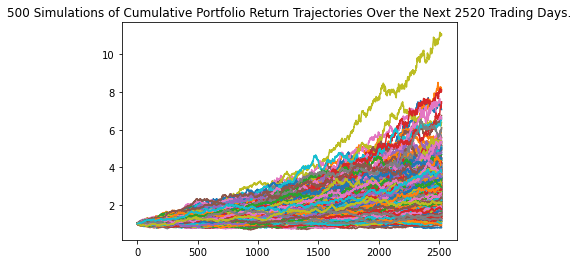

In [84]:
# Plot simulation outcomes
plotTen = mc_even_dist_ten.plot_simulation()

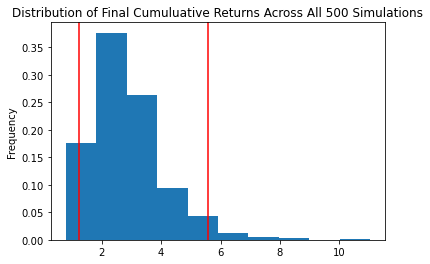

In [85]:
# Plot probability distribution and confidence intervals
distPlotTen = mc_even_dist_ten.plot_distribution()

In [86]:
# Fetch summary statistics from the Monte Carlo simulation results
tableTen = mc_even_dist_ten.summarize_cumulative_return()

# Print summary statistics
print(tableTen)

count           500.000000
mean              2.864862
std               1.229516
min               0.788921
25%               1.998562
50%               2.655580
75%               3.444611
max              11.036036
95% CI Lower      1.225709
95% CI Upper      5.585646
Name: 2520, dtype: float64


In [88]:
# Set initial investment
initial_investment_ten = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tableTen[8]*60000,2)
ci_upper_ten = round(tableTen[9]*60000,2)
# Print results

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $73542.53 and $335138.75
